A partir del archivo Euro_2012_stats_TEAM, se pide:

1. Obtener la matriz de correlación. ¿Qué columnas están mejor correlacionadas?

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles? 

3. Si tratamos la columna Goals como una columna categórica y usando logistic regression, SVM y Random forest, ¿cuántos goles marcaría un equipo que tiene...? (por cada algoritmo):

    - % de goles por disparo: 40%
    - Total shots (inc. Blocked): 102
    - Corners Taken: 5
    - Passes: 82
    - Dribbles: 23

In [2]:
import pandas as pd
df = pd.read_csv("../data/Euro_2012_stats_TEAM.csv")

df

,Team,Goals,Shots on target,Shots off target,Shooting Accuracy,% Goals-to-shots,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,...,Saves made,Saves-to-shots ratio,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
0,Croatia,4,13,12,51.9%,16.0%,32,0,0,0,...,13,81.3%,41,62,2,9,0,9,9,16
1,Czech Republic,4,13,18,41.9%,12.9%,39,0,0,0,...,9,60.1%,53,73,8,7,0,11,11,19
2,Denmark,4,10,10,50.0%,20.0%,27,1,0,0,...,10,66.7%,25,38,8,4,0,7,7,15
3,England,5,11,18,50.0%,17.2%,40,0,0,0,...,22,88.1%,43,45,6,5,0,11,11,16
4,France,3,22,24,37.9%,6.5%,65,1,0,0,...,6,54.6%,36,51,5,6,0,11,11,19
5,Germany,10,32,32,47.8%,15.6%,80,2,1,0,...,10,62.6%,63,49,12,4,0,15,15,17
6,Greece,5,8,18,30.7%,19.2%,32,1,1,1,...,13,65.1%,67,48,12,9,1,12,12,20
7,Italy,6,34,45,43.0%,7.5%,110,2,0,0,...,20,74.1%,101,89,16,16,0,18,18,19
8,Netherlands,2,12,36,25.0%,4.1%,60,2,0,0,...,12,70.6%,35,30,3,5,0,7,7,15
9,Poland,2,15,23,39.4%,5.2%,48,0,0,0,...,6,66.7%,48,56,3,7,1,7,7,17


In [1]:
import seaborn as sns

In [3]:
df.corr()

,Goals,Shots on target,Shots off target,Total shots (inc. Blocked),Hit Woodwork,Penalty goals,Penalties not scored,Headed goals,Passes,Passes completed,...,Goals conceded,Saves made,Fouls Won,Fouls Conceded,Offsides,Yellow Cards,Red Cards,Subs on,Subs off,Players Used
Goals,1.000000,0.804193,0.403821,0.650109,0.200512,0.730437,0.023094,0.349330,0.838497,0.830062,...,-0.337689,0.143912,0.663876,0.483833,0.703043,0.337709,-3.580574e-01,0.727830,0.727830,0.136067
Shots on target,0.804193,1.000000,0.611185,0.886090,0.212932,0.478610,-0.229945,0.210571,0.930337,0.923242,...,-0.214415,0.085059,0.765949,0.658353,0.696263,0.544307,-3.340500e-01,0.821342,0.821342,0.249516
Shots off target,0.403821,0.611185,1.000000,0.887032,0.581655,0.126783,-0.173221,0.002284,0.624451,0.612998,...,-0.139274,0.086157,0.615058,0.434815,0.344626,0.534186,-3.377661e-01,0.544974,0.544974,0.045973
Total shots (inc. Blocked),0.650109,0.886090,0.887032,1.000000,0.400121,0.299397,-0.234668,0.125738,0.875698,0.864279,...,-0.184740,0.148269,0.766215,0.623288,0.589635,0.622268,-3.604662e-01,0.763336,0.763336,0.157812
Hit Woodwork,0.200512,0.212932,0.581655,0.400121,1.000000,-0.076923,-0.041345,0.020174,0.095882,0.073814,...,0.062541,-0.230524,0.141180,0.303987,0.113657,0.319708,-2.820513e-01,0.204511,0.204511,-0.189466
Penalty goals,0.730437,0.478610,0.126783,0.299397,-0.076923,1.000000,0.537484,-0.020174,0.545294,0.550720,...,-0.020847,0.058761,0.528185,0.114404,0.627220,0.085467,1.794872e-01,0.531727,0.531727,0.351866
Penalties not scored,0.023094,-0.229945,-0.173221,-0.234668,-0.041345,0.537484,1.000000,-0.357830,-0.169613,-0.179278,...,0.302532,0.051019,0.163643,-0.107169,0.210417,0.127603,5.374838e-01,0.084796,0.084796,0.480079
Headed goals,0.349330,0.210571,0.002284,0.125738,0.020174,-0.020174,-0.357830,1.000000,0.213073,0.200605,...,-0.344447,0.458773,0.157215,0.117445,0.188786,0.067245,-3.429623e-01,0.216077,0.216077,-0.447214
Passes,0.838497,0.930337,0.624451,0.875698,0.095882,0.545294,-0.169613,0.213073,1.000000,0.997697,...,-0.284982,0.207240,0.773382,0.549248,0.731938,0.465799,-4.002506e-01,0.800546,0.800546,0.232214
Passes completed,0.830062,0.923242,0.612998,0.864279,0.073814,0.550720,-0.179278,0.200605,0.997697,1.000000,...,-0.300837,0.184878,0.738845,0.499351,0.704802,0.420410,-4.062897e-01,0.766326,0.766326,0.213345


In [9]:
import matplotlib.pyplot as plt

<AxesSubplot:>

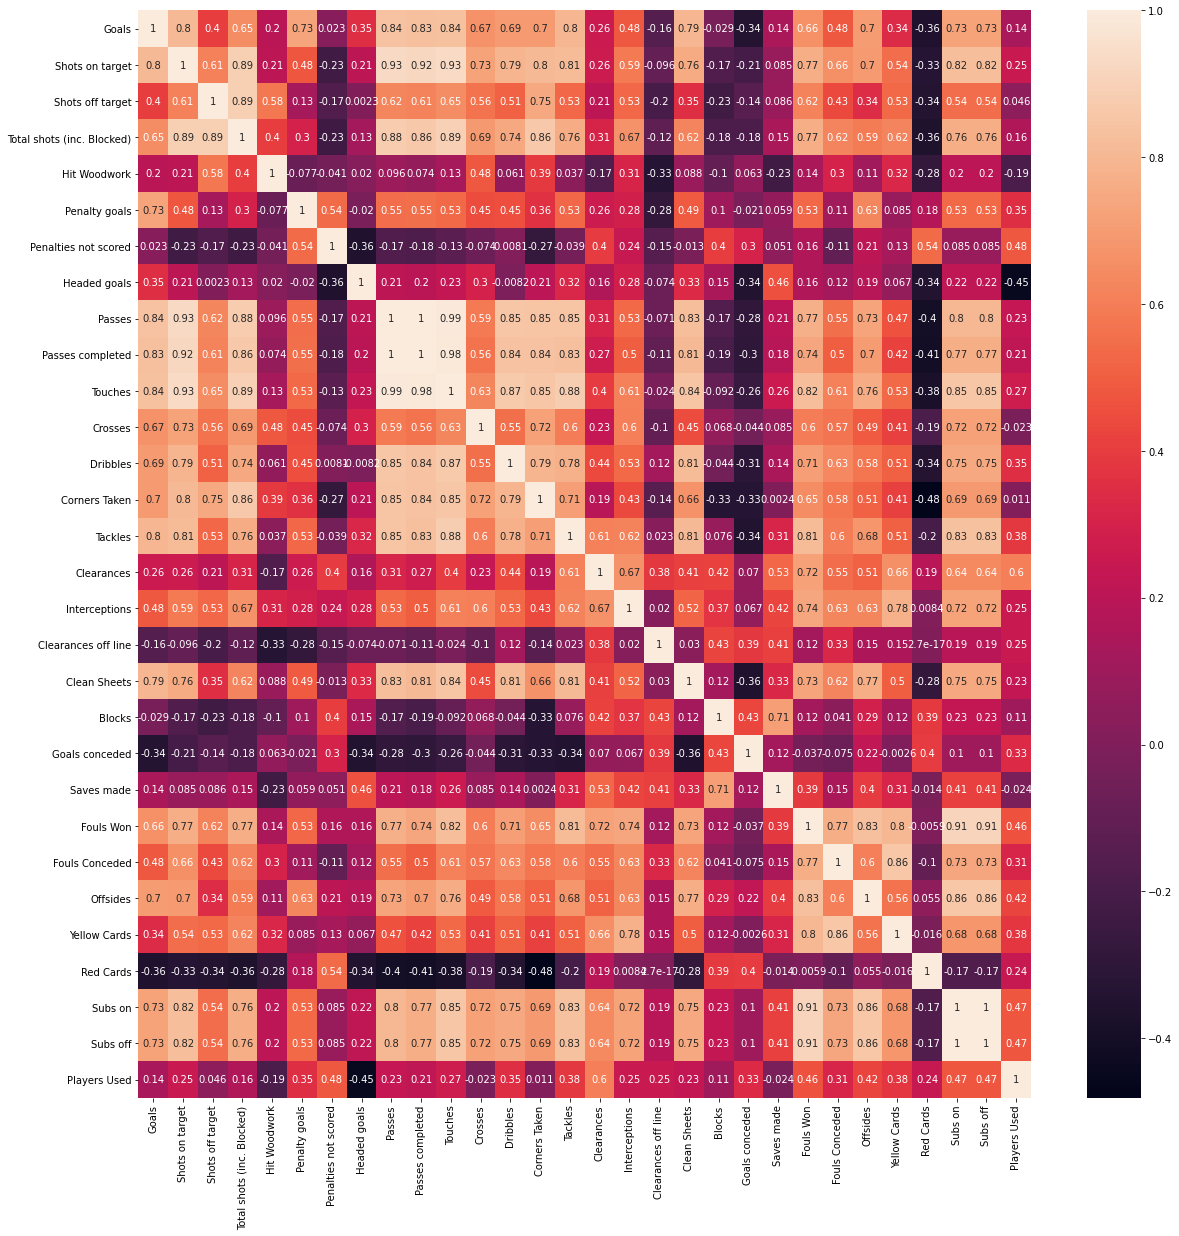

In [11]:
plt.subplots(figsize=(20,20))
sns.heatmap(df.corr(), annot=True)

In [15]:
import numpy as np

In [34]:
t = df.corr().where(np.triu(np.ones(df.corr().shape), k=1).astype(np.bool))
corr_max = t.unstack().dropna().sort_values(ascending=False)
print(corr_max[:10])
print("--------------------------------------------------------")
print(corr_max[-10:])

Subs off          Subs on                       1.000000
Passes completed  Passes                        0.997697
Touches           Passes                        0.993044
                  Passes completed              0.984324
                  Shots on target               0.934623
Passes            Shots on target               0.930337
Passes completed  Shots on target               0.923242
Subs on           Fouls Won                     0.907719
Subs off          Fouls Won                     0.907719
Touches           Total shots (inc. Blocked)    0.894708
dtype: float64
--------------------------------------------------------
Goals conceded  Headed goals                 -0.344447
Headed goals    Penalties not scored         -0.357830
Red Cards       Goals                        -0.358057
Goals conceded  Clean Sheets                 -0.358468
Red Cards       Total shots (inc. Blocked)   -0.360466
                Touches                      -0.377954
                Passes      

2. ¿Existe algún tipo de relación entre la precisión de disparo a puerta (Shooting Accuracy) con respecto a los goles? Muestra en una gráfica (pintando la línea en la distribución de ambas variables) y usando Regresión Lineal, Regresión no Lineal con polinomio y SVR la relación entre ambos. Por cada porcentaje de acierto de cara a puerta, ¿cuánto aumenta o disminuye el número de goles?

In [36]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import SelectKBest
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV

In [37]:
X = np.array(df["Shooting Accuracy"]).reshape(-1, 1)
y = np.array(df["Goals"])